### Data Loading

In [3]:
import datasets
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, TimeSeriesSplit, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

In [4]:
# Load the TSLA dataset using the datasets library
tesla_data = datasets.load_dataset('codesignal/tsla-historic-prices')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/3347 [00:00<?, ? examples/s]

In [5]:
# Create DataFrame from the dataset
tesla_df = pd.DataFrame(tesla_data['train'])

In [6]:
# Display the first few rows of the DataFrame
print(tesla_df.head())

         Date      Open      High       Low     Close  Adj Close     Volume
0  2010-06-29  1.266667  1.666667  1.169333  1.592667   1.592667  281494500
1  2010-06-30  1.719333  2.028000  1.553333  1.588667   1.588667  257806500
2  2010-07-01  1.666667  1.728000  1.351333  1.464000   1.464000  123282000
3  2010-07-02  1.533333  1.540000  1.247333  1.280000   1.280000   77097000
4  2010-07-06  1.333333  1.333333  1.055333  1.074000   1.074000  103003500


In [7]:
tesla_df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

### Basic Data Inspection

In [8]:
# Print basic information about the dataset
tesla_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3347 entries, 0 to 3346
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3347 non-null   object 
 1   Open       3347 non-null   float64
 2   High       3347 non-null   float64
 3   Low        3347 non-null   float64
 4   Close      3347 non-null   float64
 5   Adj Close  3347 non-null   float64
 6   Volume     3347 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 183.2+ KB


In [9]:
# Display summary statistics
tesla_df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3347.000000,3347.000000,3347.000000,3347.000000,3347.000000,3.347000e+03
mean,67.901248,69.413435,66.277711,67.886520,67.886520,9.643192e+07
std,100.209872,102.472746,97.725721,100.136888,100.136888,8.058132e+07
min,1.076000,1.108667,0.998667,1.053333,1.053333,1.777500e+06
25%,10.152000,10.432000,9.891334,10.081333,10.081333,4.540425e+07
50%,16.793333,17.000000,16.547333,16.771334,16.771334,8.011650e+07
75%,66.069336,67.129334,63.908667,65.896000,65.896000,1.230548e+08
max,411.470001,414.496674,405.666656,409.970001,409.970001,9.140820e+08


In [10]:
#Convert the Date column to datetime type
tesla_df['Date'] = pd.to_datetime(tesla_df['Date'])

#Set the Date column as the index
tesla_df.set_index('Date', inplace=True)

#Sort the DataFrame based on the index
tesla_df.sort_index(ascending=True, inplace=True)

In [11]:
tesla_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


### Data Visualization

<ipython-input-12-62b579793d87>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  xy=(tesla_df.index[1], tesla_df['Open'][1]),
<ipython-input-12-62b579793d87>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  xytext=(tesla_df.index[1], tesla_df['Open'][1] + 0.5),


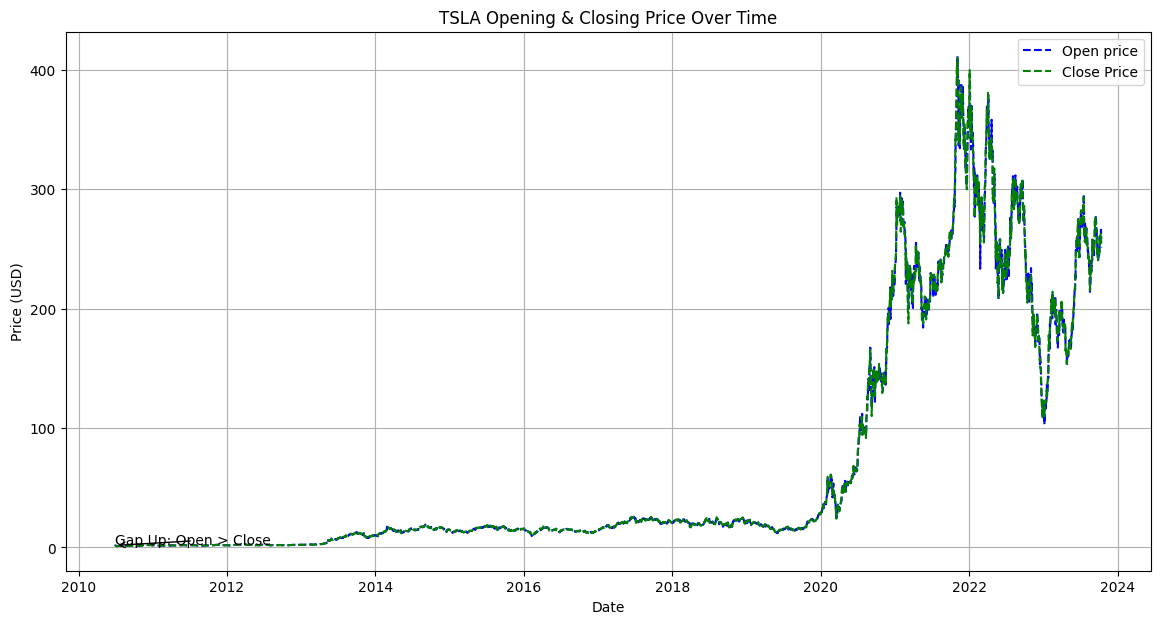

In [12]:
# Plot the 'Open' prices with custom color and figure size
plt.figure(figsize=(14, 7))
plt.plot(tesla_df.index, tesla_df['Open'], color='Blue', linestyle='--')
plt.plot(tesla_df.index, tesla_df['Close'], color='green', linestyle='--')

# Highlighting the key change
# Highlighting the key change
plt.annotate(
    'Gap Up: Open > Close',
    xy=(tesla_df.index[1], tesla_df['Open'][1]),
    xytext=(tesla_df.index[1], tesla_df['Open'][1] + 0.5),
    arrowprops=dict(facecolor='black', arrowstyle="->"),
    fontsize=10
)


# Add titles and labels
plt.title('TSLA Opening & Closing Price Over Time')

plt.xlabel('Date')
plt.ylabel('Price (USD)')

# Add legend and grid
plt.legend(['Open price','Close Price'])
plt.grid(True)

# Display the plot
plt.show()

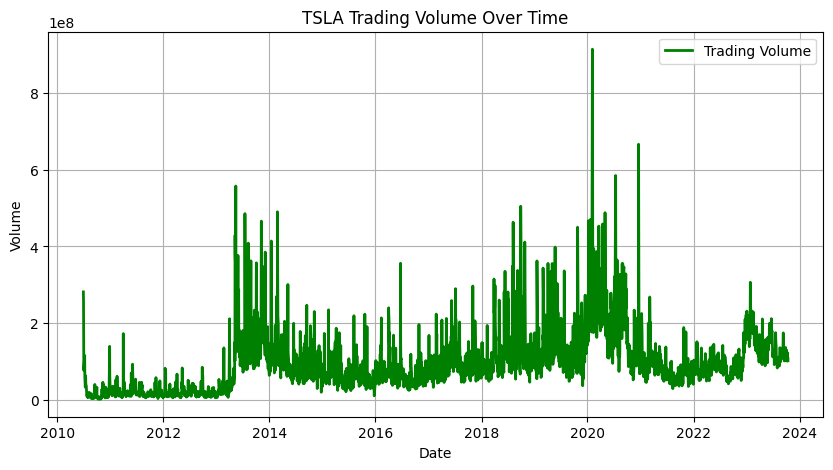

In [13]:
# Plot the 'Volume' traded over time
plt.figure(figsize=(10, 5))
# TODO: Plot the 'Volume' column over time.
plt.plot(tesla_df.index, tesla_df['Volume'], color='green', linestyle='-', linewidth=2)
# Add titles and labels
plt.title('TSLA Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')

# Add legend and grid
plt.legend(['Trading Volume'])
plt.grid(True)

# Display the plot
plt.show()

### Key Indicators:
Open Price: The price at which the first transaction occurs after the market opens.
</br> </br>
Close price: In financial data refers to the last price at which a stock or other financial asset was traded during the regular trading session of a given day

*   If a stock's close price is $100 today, that means it was the final price at the end of the trading session.

*   Comparing the close price with the open price of the next day (e.g., if the stock opens at $102) can provide insights into whether the market is showing buying interest or selling pressure after the market closes.

High Price: The high price is the highest price at which the stock or asset traded during the day (or any specific period).

Low Price: The low price is the lowest price at which the stock or asset traded during the day.

 Adj Close (Adjusted Close Price): Adjusted close price is the closing price of a stock that has been adjusted for corporate actions, such as dividends, stock splits, or new stock issuance.

 If you're comparing the stock's historical prices over a year to measure growth or decline, using Adj Close will give you a more accurate picture since it factors in dividend payments or stock splits, which impact the stock's overall value.

 Volume refers to the total number of shares or contracts traded for a security (such as a stock) during a given period, typically a day.

Key Points About Volume:
- High Volume: Indicates a lot of interest in the stock, either due to high buying or selling activity. It often accompanies significant price movements, either up or down.
- Low Volume: Suggests that there is less trading interest in the stock, and it may result in more stable price movements or lower liquidity.


SMA (Simple Moving Average) is a commonly used technical analysis tool in financial markets that calculates the average of a stock’s price over a specific period.

- A 50-day SMA might be used by long-term investors to confirm a trend. If a stock's price consistently stays above the 50-day SMA, it may indicate a strong upward trend.
- A 10-day SMA could be used by day traders to make quicker decisions based on short-term trends in price movements.

Investors often use multiple SMAs (like 50-day and 200-day) together. When a shorter-term SMA crosses above a longer-term SMA (a "golden cross"), it can signal a potential buy. When a shorter SMA crosses below a longer SMA (a "death cross"), it can signal a potential sell.

In [14]:
tesla_df['SMA_20'] = tesla_df['Close'].rolling(window=20).mean()

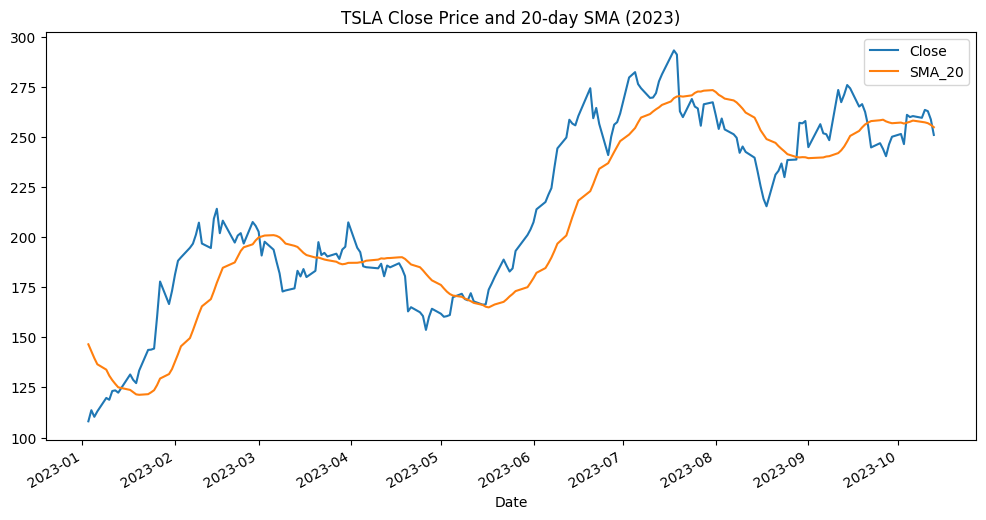

In [15]:
# Using a smaller date range for better visualization
tesla_df_small = tesla_df.loc['2023']

# Plotting
tesla_df_small[['Close', 'SMA_20']].plot(figsize=(12, 6), title="TSLA Close Price and 20-day SMA (2023)")
plt.show()

**EMA (Exponential Moving Average)** is a type of moving average used in technical analysis to smooth out price data and highlight trends over time. Unlike the Simple Moving Average (SMA), which gives equal weight to all prices in the period, the EMA gives more weight to recent prices. This makes it more responsive to recent price changes.

Traders often use EMAs of different periods (e.g., 12-day and 26-day) to generate trade signals. A common strategy is to buy when a shorter-term EMA crosses above a longer-term EMA (bullish crossover) and sell when it crosses below (bearish crossover).

 You could use a 10-day EMA to gauge recent price movement. If the stock price consistently stays above the 10-day EMA and the EMA is rising, it indicates a strong upward trend. Conversely, if the price falls below the EMA and the EMA starts to decline, it might signal a potential downtrend.

In [16]:
tesla_df['EMA_20'] = tesla_df['Close'].ewm(span=20, adjust=False).mean()

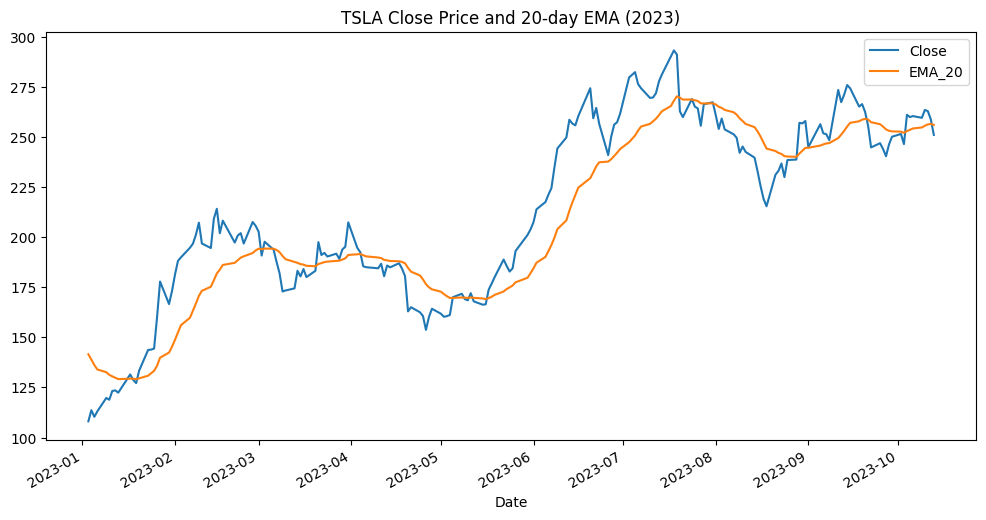

In [17]:
# Using a smaller date range for better visualization
tesla_df_small = tesla_df.loc['2023']

# Plotting the closing prices and the 20-day EMA
tesla_df_small[['Close', 'EMA_20']].plot(figsize=(12, 6), title="TSLA Close Price and 20-day EMA (2023)")
plt.show()

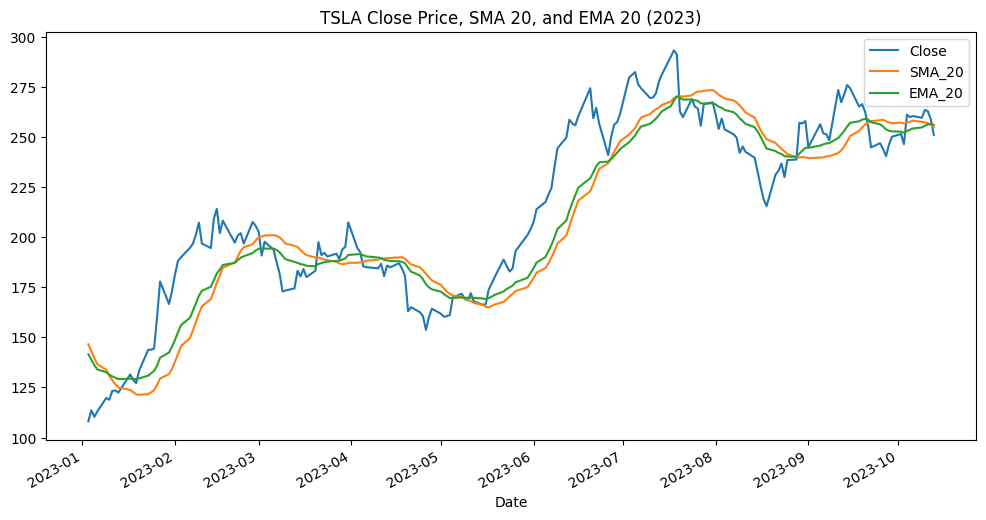

In [18]:
tesla_df_small = tesla_df.loc['2023']

# Plotting
tesla_df_small[['Close','SMA_20', 'EMA_20']].plot(figsize=(12, 6), title="TSLA Close Price, SMA 20, and EMA 20 (2023)")
plt.show()

In [19]:
# Calculate 50-day and 200-day SMAs
tesla_df['SMA_50'] = tesla_df['Close'].rolling(window=50).mean()
tesla_df['SMA_200'] = tesla_df['Close'].rolling(window=200).mean()

In [20]:
# Identifying the "Golden Cross" and "Death Cross"
tesla_df['Signal'] = 0  # Default value
tesla_df.loc[tesla_df['SMA_50'] > tesla_df['SMA_200'], 'Signal'] = 1 # Golden cross
tesla_df.loc[tesla_df['SMA_50'] < tesla_df['SMA_200'], 'Signal'] = -1 # Death Cross

.diff(): This method calculates the difference between the current row and the previous row in the 'Signal' column.

By applying .diff(), we can detect changes in the 'Signal' values:

A value of 2 indicates a Golden Cross (from -1 to 1).

A value of -2 indicates a Death Cross (from 1 to -1).


In [21]:
# Creating a column to mark crossover points
tesla_df['Crossover'] = tesla_df['Signal'].diff()

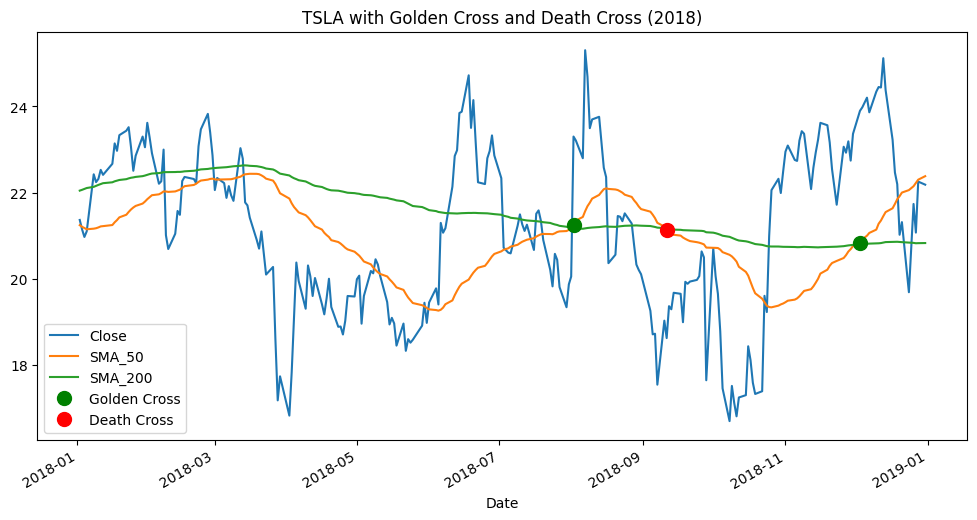

In [23]:
# Using a smaller date range for better visualization
tesla_df_small = tesla_df.loc['2018']

# Plot with Golden Cross and Death Cross
fig, ax = plt.subplots(figsize=(12, 6))
tesla_df_small[['Close', 'SMA_50', 'SMA_200']].plot(ax=ax, title="TSLA with Golden Cross and Death Cross (2018)")

# Highlighting Golden Cross and Death Cross points
crosses = tesla_df_small[tesla_df_small['Crossover'] != 0]  # Filter for crossover points

# Initialize flags for legend labels
golden_cross_added = False
death_cross_added = False

for idx, row in crosses.iterrows():
    if row['Crossover'] == 2:
        plt.plot(idx, row['SMA_50'], 'go', markersize=10, label='Golden Cross' if not golden_cross_added else "")
        golden_cross_added = True
    elif row['Crossover'] == -2:
        plt.plot(idx, row['SMA_50'], 'ro', markersize=10, label='Death Cross' if not death_cross_added else "")
        death_cross_added = True

plt.legend()
plt.show()

VWAP stands for Volume Weighted Average Price. It is a trading benchmark used in financial markets to give a more accurate picture of a stock’s price during a specific period by considering both the price and the volume of trades.

Traders often aim to buy below the VWAP or sell above it.



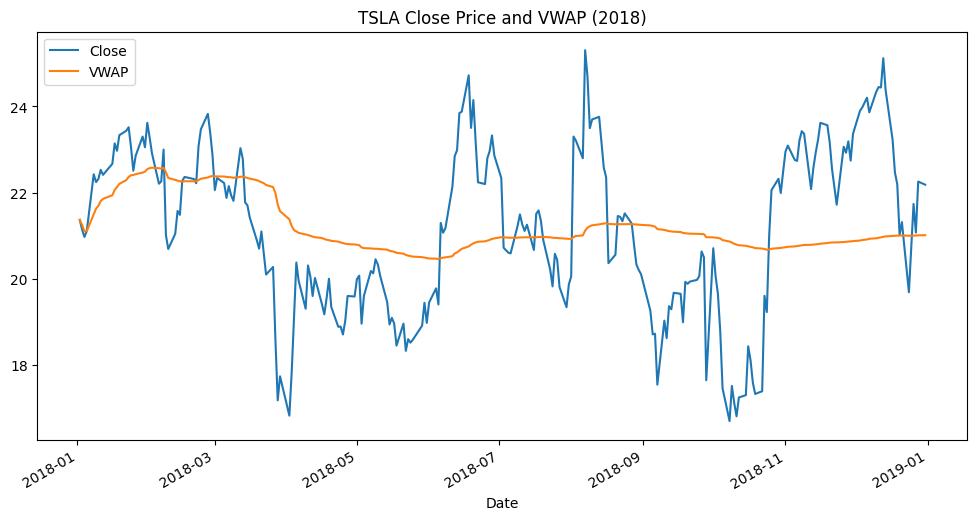

In [24]:
# Filter data for the year 2018
tesla_df_small = tesla_df.loc['2018'].copy()

# Calculate VWAP
tesla_df_small['VWAP'] = (np.cumsum(tesla_df_small['Volume'] * tesla_df_small['Close']) /
                          np.cumsum(tesla_df_small['Volume']))

# Visualize VWAP with Close Price
tesla_df_small[['Close', 'VWAP']].plot(figsize=(12, 6), title="TSLA Close Price and VWAP (2018)")
plt.show()

### Feature Engineering

In [25]:
tesla_df['Previous Close'] = tesla_df['Adj Close'].shift(1)

# Simple Moving Averages (SMA) and Exponential Moving Averages (EMA)
tesla_df['SMA_5'] = tesla_df['Adj Close'].rolling(window=5).mean()
tesla_df['SMA_10'] = tesla_df['Adj Close'].rolling(window=10).mean()
tesla_df['EMA_5'] = tesla_df['Adj Close'].ewm(span=5, adjust=False).mean()
tesla_df['EMA_10'] = tesla_df['Adj Close'].ewm(span=10, adjust=False).mean()

# Relative Strength Index (RSI) for momentum
delta = tesla_df['Adj Close'].diff(1)
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()
rs = avg_gain / avg_loss
tesla_df['RSI'] = 100 - (100 / (1 + rs))

# Bollinger Bands for volatility
tesla_df['BB_upper'] = tesla_df['Adj Close'].rolling(window=20).mean() + 2 * tesla_df['Adj Close'].rolling(window=20).std()
tesla_df['BB_lower'] = tesla_df['Adj Close'].rolling(window=20).mean() - 2 * tesla_df['Adj Close'].rolling(window=20).std()

# Volume Price Trend (VPT)
tesla_df['VPT'] = (tesla_df['Volume'] * (tesla_df['Adj Close'].pct_change())).cumsum()

In [26]:
# Drop rows with NaN values generated by moving averages
tesla_df.dropna(inplace=True)

In [27]:
# Additional features
tesla_df['Day Percentage Change'] = (tesla_df['Adj Close'] - tesla_df['Previous Close']) / tesla_df['Previous Close'] * 100
tesla_df['High-Low Spread'] = tesla_df['High'] - tesla_df['Low']
tesla_df['Close-Prev Close Ratio'] = tesla_df['Adj Close'] / tesla_df['Previous Close']


In [28]:
# Selecting features and target variable
# features = tesla_df[['Open', 'High', 'Low', 'Volume', 'Previous Close', 'High-Low Spread',
#                      'Close-Prev Close Ratio', 'SMA_5', 'SMA_10', 'EMA_5', 'EMA_10', 'VWAP']].values
features = tesla_df[['High-Low Spread', 'Close-Prev Close Ratio', 'SMA_5', 'SMA_10', 'EMA_5', 'EMA_10', 'RSI', 'BB_upper', 'BB_lower', 'VPT']].values
target = tesla_df['Day Percentage Change'].values

In [29]:
# Standardizing the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

``TimeSeriesSplit`` is a cross-validation strategy provided by the sklearn library for time series data. Unlike traditional cross-validation techniques (such as KFold), TimeSeriesSplit is specifically designed to respect the temporal ordering of data, making it suitable for time series problems

Key Features:
- Preserves Order: Unlike random splitting in traditional cross-validation, TimeSeriesSplit maintains the time order, ensuring that data from the future is never used to predict the past.
- Sequential Splitting: It splits the data into a training set and a test set multiple times, with each iteration expanding the training set and shifting the test set forward.

Imagine you have 10 data points in a time series, and you want to split them using 3 splits. TimeSeriesSplit would split the data as follows:

Split 1: Train on data points [1, 2], Test on [3]

Split 2: Train on data points [1, 2, 3, 4], Test on [5, 6]

Split 3: Train on data points [1, 2, 3, 4, 5, 6], Test on [7, 8]


In [30]:
# Use TimeSeriesSplit for sequential cross-validation
tscv = TimeSeriesSplit(n_splits=5)

### Model Training & Evaluation

In [31]:
# Perform a final train-test split for model evaluation
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, shuffle=False)


In [32]:
# Set up the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5]
}


In [33]:
# Instantiate the Gradient Boosting Regressor
model = GradientBoostingRegressor(random_state=42)

# Use GridSearchCV to find the best model and hyperparameters
grid_search = GridSearchCV(model, param_grid, cv=tscv, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the model using TimeSeriesSplit cross-validation
grid_search.fit(X_train, y_train)

# Best model found through GridSearchCV
best_model = grid_search.best_estimator_

# Print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

Best hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}


In [34]:
# Evaluate the best model on the hold-out test set
test_predictions = best_model.predict(X_test)
test_mse = mean_squared_error(y_test, test_predictions)
print("Mean Squared Error on the Test Set:", test_mse)

Mean Squared Error on the Test Set: 0.006098894162308201


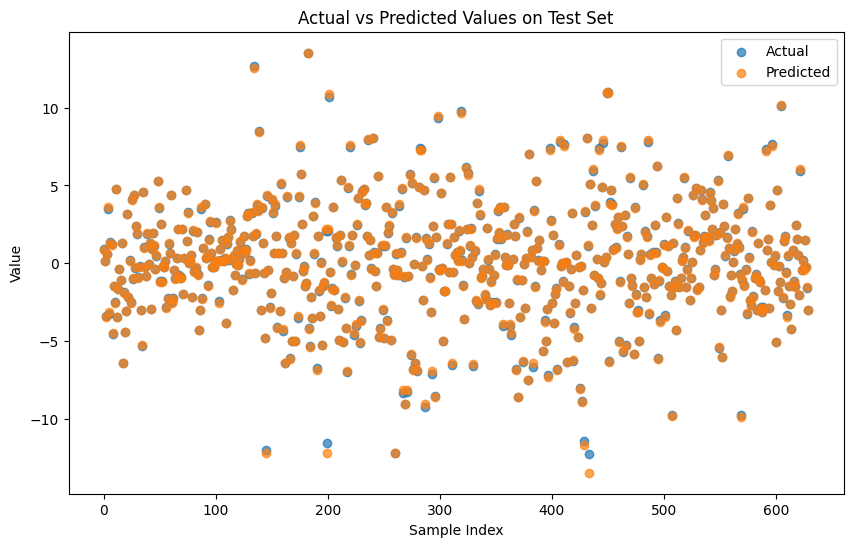

In [35]:
# Visualizing predictions on the test set
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, label="Actual", alpha=0.7)
plt.scatter(range(len(test_predictions)), test_predictions, label="Predicted", alpha=0.7)
plt.title("Actual vs Predicted Values on Test Set")
plt.xlabel("Sample Index")
plt.ylabel("Value")
plt.legend()
plt.show()

In [36]:
import joblib
# Save the model and scaler to disk
joblib.dump(best_model, 'Trading_model.pkl')  # Saves model as 'model.pkl'
joblib.dump(scaler, 'Trading_scaler.pkl')  # Saves scaler as 'scaler.pkl'


['Trading_scaler.pkl']

In [14]:
!pip install pyngrok

# Streamlit App

In [2]:
import streamlit as st
import pandas as pd
import joblib  # Correct import for joblib

In [5]:
# Function to load model and scaler
def load_model():
    # Load the pre-trained model and scaler from disk
    model = joblib.load('Trading_model.pkl')  # Adjust path if needed
    scaler = joblib.load('Trading_scaler.pkl')  # Adjust path if needed
    return model, scaler

In [6]:
# Load model and scaler
model, scaler = load_model()

In [12]:
def calculate_features(high, low, adj_close, prev_close, volume):
    # Calculated Features
    high_low_spread = high - low

    # Handle division by zero for Close-Prev Close Ratio
    if prev_close != 0:
        close_prev_close_ratio = adj_close / prev_close
    else:
        st.warning("Previous Close Price cannot be zero for ratio calculation.")
        close_prev_close_ratio = 1  # Default value or handle as you see fit

    # Ask for moving averages if not provided (or user may provide them)
    sma_5 = st.number_input('5-Day Simple Moving Average (SMA)', value=adj_close)  # Placeholder default value
    sma_10 = st.number_input('10-Day Simple Moving Average (SMA)', value=adj_close)

    ema_5 = st.number_input('5-Day Exponential Moving Average (EMA)', value=adj_close)
    ema_10 = st.number_input('10-Day Exponential Moving Average (EMA)', value=adj_close)

    # RSI Calculation: We need some historical data, so let the user input it manually
    rsi = st.number_input('Relative Strength Index (RSI)', value=50.0)

    # Bollinger Bands
    bb_upper = st.number_input('Bollinger Band Upper', value=adj_close + 10)
    bb_lower = st.number_input('Bollinger Band Lower', value=adj_close - 10)

    # Volume Price Trend (VPT) Calculation
    if prev_close != 0:
        vpt = (volume * (adj_close - prev_close) / prev_close)
    else:
        st.warning("Previous Close Price cannot be zero for VPT calculation.")
        vpt = 0  # Default value or handle as you see fit

    # Return all features
    return [high_low_spread, close_prev_close_ratio, sma_5, sma_10, ema_5, ema_10, rsi, bb_upper, bb_lower, vpt]

In [10]:
# Function to predict the next day's percentage change
def predict_next_day(features):
    # Convert input features to DataFrame for prediction
    features_df = pd.DataFrame([features], columns=[
        'High-Low Spread', 'Close-Prev Close Ratio', 'SMA_5', 'SMA_10',
        'EMA_5', 'EMA_10', 'RSI', 'BB_upper', 'BB_lower', 'VPT'
    ])

    # Scale the features
    features_scaled = scaler.transform(features_df)

    # Predict the next day's percentage change
    prediction = model.predict(features_scaled)
    return prediction[0]

In [18]:
!ngrok config add-authtoken 2Z2rQyRIdNAPteTFV7UrALo3UQO_7QhvQeNH9pExRpfHyMZ7v

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [21]:
# Run Streamlit and ngrok to expose it
from pyngrok import ngrok

# Start a Streamlit server using the HTTP protocol explicitly
public_url = ngrok.connect(8501, "http")
print(f"Streamlit app is live at {public_url}")

!streamlit run app.py

Streamlit app is live at NgrokTunnel: "https://a29a-34-42-108-138.ngrok-free.app" -> "http://localhost:8501"



  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.42.108.138:8501

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


  Stopping...
  Stopping...
